In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-dataset/netflix_titles.csv


Data from netflix to build a neural network with one layer 

Using only numpy, pandas,mathplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/netflix-dataset/netflix_titles.csv")

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

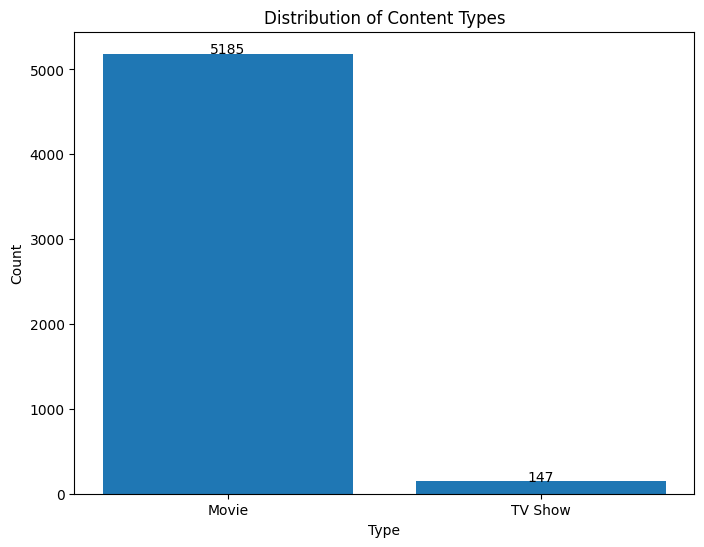

In [9]:
counts = data['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values)
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, f"{int(count)}", ha='center')

plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [10]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [11]:
data1 = pd.get_dummies(data, columns=["type", "country", "listed_in"])

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Columns: 950 entries, show_id to listed_in_Thrillers
dtypes: bool(941), int64(1), object(8)
memory usage: 5.2+ MB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [14]:
# Normalize numerical features
data1["release_year"] = pd.to_numeric(data1["release_year"], errors='coerce')
data1["release_year"] = (data1["release_year"] - data1["release_year"].min()) / (data1["release_year"].max() - data1["release_year"].min())
data1["rating"] = pd.to_numeric(data1["rating"], errors='coerce')
data1["rating"] = (data1["rating"] - data1["rating"].min()) / (data1["rating"].max() - data1["rating"].min())
data1["duration"] = pd.to_numeric(data1["duration"], errors='coerce')
data1["duration"] = (data1["duration"] - data1["duration"].min()) / (data1["duration"].max() - data1["duration"].min())


In [15]:
data1.head()

,show_id,title,director,cast,date_added,release_year,rating,duration,description,type_Movie,...,listed_in_Stand-Up Comedy,listed_in_Stand-Up Comedy & Talk Shows,"listed_in_Stand-Up Comedy & Talk Shows, TV Comedies","listed_in_TV Action & Adventure, TV Sci-Fi & Fantasy",listed_in_TV Comedies,"listed_in_TV Comedies, TV Dramas",listed_in_TV Dramas,"listed_in_TV Horror, TV Mysteries, TV Thrillers",listed_in_TV Shows,listed_in_Thrillers
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",0.645570,NaN,NaN,"On a photo shoot in Ghana, an American model s...",True,...,False,False,False,False,False,False,False,False,False,False
8,s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","September 24, 2021",1.000000,NaN,NaN,A talented batch of amateur bakers face off in...,False,...,False,False,False,False,False,False,False,False,False,False
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021",1.000000,NaN,NaN,A woman adjusting to life after a loss contend...,True,...,False,False,False,False,False,False,False,False,False,False
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","September 23, 2021",1.000000,NaN,NaN,After most of her family is murdered in a terr...,True,...,False,False,False,False,False,False,False,False,False,False
24,s25,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...","September 21, 2021",0.708861,NaN,NaN,When the father of the man she loves insists t...,True,...,False,False,False,False,False,False,False,False,False,False
